In [1]:
"""
Created on Sun June 23 2019

@author: John Kath
"""
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data pre processing
file_name_to_colume_names = {
    'Accelerometer.csv': ['Systime', 'EventTime', 'ActivityID', 'X', 'Y', 'Z', 'Phone_orientation'],
    'Gyroscope.csv': ['Systime', 'EventTime', 'ActivityID', 'X', 'Y', 'Z', 'Phone_orientation'],
}

In [3]:
def read_file(user_id: str, user_session_id: str, file_name: str, colume_names: List[str]) -> DataFrame:
    """
    Read one of the csv files for a user
    :param user_id: user id
    :param user_session_id: user session id
    :param file_name: csv file name (key of file_name_to_colume_names)
    :param colume_names: a list of column names of the csv file (value of file_name_to_colume_names)
    :return: content of the csv file as pandas DataFrame
    """
    # read data from csv
    filename = user_id + '_session_' + user_session_id + '_' + file_name
    csv_data = pd.read_csv(filename, names=colume_names)
    return pd.DataFrame(data=csv_data)

In [4]:
# pick the user as well as activities and extract 3 out of 6 features
data_acc = read_file('984799', '16', 'Accelerometer.csv', file_name_to_colume_names['Accelerometer.csv'])
data_gyr = read_file('984799', '16', 'Gyroscope.csv', file_name_to_colume_names['Gyroscope.csv'])
# print(data_acc.dtypes)
# print(data_gyr.dtypes)

In [5]:
# pick the user as well as activities and extract 3 out of 6 features
data_acc_2 = read_file('151985', '2', 'Accelerometer.csv', file_name_to_colume_names['Accelerometer.csv'])
data_gyr_2 = read_file('151985', '2', 'Gyroscope.csv', file_name_to_colume_names['Gyroscope.csv'])
# print(data_acc.dtypes)
# print(data_gyr.dtypes)

In [6]:
def plot_parametric_feature(x, y, z, label_name, color_name):
    # 3d parametric plot of feature
    plt.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, z, label=label_name, color=color_name)
    ax.legend()
    plt.show()

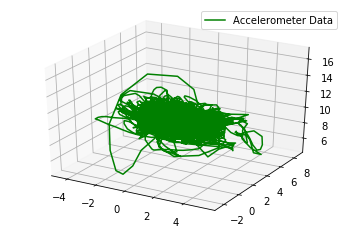

In [7]:
# visualize of the features you pick
x_val = data_acc['X']
y_val = data_acc['Y']
z_val = data_acc['Z']
plot_parametric_feature(x_val, y_val, z_val,'Accelerometer Data', 'g')

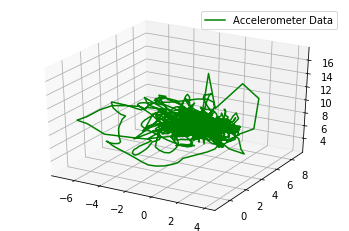

In [8]:
# visualize of the features you pick
x_val = data_acc_2['X']
y_val = data_acc_2['Y']
z_val = data_acc_2['Z']
plot_parametric_feature(x_val, y_val, z_val,'Accelerometer Data', 'g')

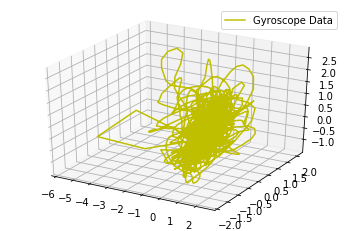

In [9]:
# visualize of the features you pick
x_val = data_gyr['X']
y_val = data_gyr['Y']
z_val = data_gyr['Z']
plot_parametric_feature(x_val, y_val, z_val,'Gyroscope Data', 'y')

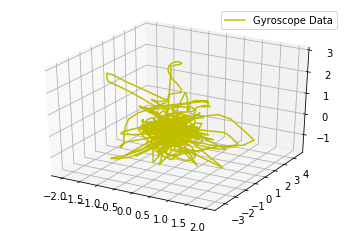

In [10]:
# visualize of the features you pick
x_val = data_gyr_2['X']
y_val = data_gyr_2['Y']
z_val = data_gyr_2['Z']
plot_parametric_feature(x_val, y_val, z_val,'Gyroscope Data', 'y')

In [11]:
def plot_unit_sphere_feature(x, y, z, label_name, color_name):
    # 3d parametric plot of feature
    plt.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # make data for the sphere surface
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_s = np.outer(np.cos(u), np.sin(v))
    y_s = np.outer(np.sin(u), np.sin(v))
    z_s = np.outer(np.ones(np.size(u)), np.cos(v))
    # plot the sphere surface
    ax.plot_surface(x_s, y_s, z_s,alpha=0.1)
    # plot the date points of normalized df_pick3 on the sphere    
    ax.scatter(x, y, z, label=label_name, color=color_name)
    ax.legend()
    plt.show()

In [12]:
def normalize(v: np.ndarray) -> np.ndarray:
    """
    Calculate normalized vector  
    :param v: input vector
    :return: normalized vector
    """
    norm_v = np.linalg.norm(v)
    if norm_v != 0:
        normalize_v = v / norm_v
    else:
        normalize_v = v
    return normalize_v

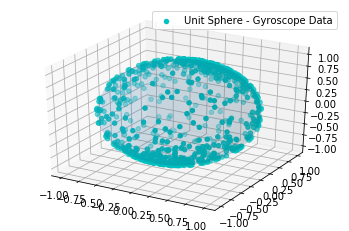

In [13]:
# calucate normalized vector and plot on sphere for the features you pick

data = data_gyr
unit_sphere_data = []
step_size = 50
for i in range(0, len(data['Systime']) - step_size, step_size):
    v = [data['X'][i], data['Y'][i], data['Z'][i]]
    unit_sphere_data.append(normalize(v).tolist())

x_val = [row[0] for row in unit_sphere_data]
y_val = [row[1] for row in unit_sphere_data]
z_val = [row[2] for row in unit_sphere_data]
plot_unit_sphere_feature(x_val, y_val, z_val,'Unit Sphere - Gyroscope Data', 'c')

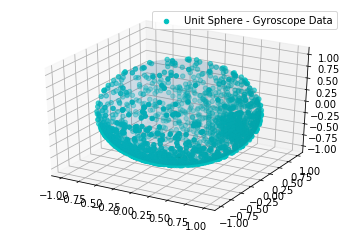

In [14]:
# calucate normalized vector and plot on sphere for the features you pick

data = data_gyr_2
unit_sphere_data = []
step_size = 50
for i in range(0, len(data['Systime']) - step_size, step_size):
    v = [data['X'][i], data['Y'][i], data['Z'][i]]
    unit_sphere_data.append(normalize(v).tolist())

x_val = [row[0] for row in unit_sphere_data]
y_val = [row[1] for row in unit_sphere_data]
z_val = [row[2] for row in unit_sphere_data]
plot_unit_sphere_feature(x_val, y_val, z_val,'Unit Sphere - Gyroscope Data', 'c')

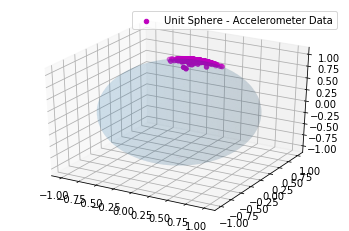

In [15]:
# calucate normalized vector and plot on sphere for the features you pick

data = data_acc
unit_sphere_data = []
step_size = 50
for i in range(0, len(data['Systime']) - step_size, step_size):
    v = [data['X'][i], data['Y'][i], data['Z'][i]]
    unit_sphere_data.append(normalize(v).tolist())

x_val = [row[0] for row in unit_sphere_data]
y_val = [row[1] for row in unit_sphere_data]
z_val = [row[2] for row in unit_sphere_data]
plot_unit_sphere_feature(x_val, y_val, z_val,'Unit Sphere - Accelerometer Data', 'm')

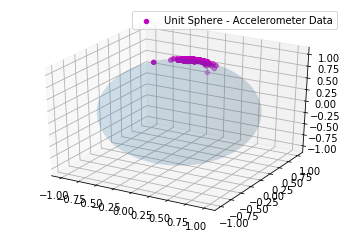

In [16]:
# calucate normalized vector and plot on sphere for the features you pick

data = data_acc_2
unit_sphere_data = []
step_size = 50
for i in range(0, len(data['Systime']) - step_size, step_size):
    v = [data['X'][i], data['Y'][i], data['Z'][i]]
    unit_sphere_data.append(normalize(v).tolist())

x_val = [row[0] for row in unit_sphere_data]
y_val = [row[1] for row in unit_sphere_data]
z_val = [row[2] for row in unit_sphere_data]
plot_unit_sphere_feature(x_val, y_val, z_val,'Unit Sphere - Accelerometer Data', 'm')